In [1]:
# installing the kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing the Dog and Cat Dataset from Kaggle


In [ ]:
#Kaggle api
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of image:',file_count)

Number of image: 25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.7728.jpg', 'dog.10395.jpg', 'dog.984.jpg', 'cat.8442.jpg', 'cat.7026.jpg', 'dog.1674.jpg', 'cat.10704.jpg', 'dog.7840.jpg', 'cat.2661.jpg', 'cat.6592.jpg', 'cat.11471.jpg', 'cat.5606.jpg', 'cat.8026.jpg', 'dog.580.jpg', 'cat.167.jpg', 'dog.10626.jpg', 'cat.8684.jpg', 'dog.8979.jpg', 'cat.7595.jpg', 'dog.353.jpg', 'dog.4098.jpg', 'cat.11851.jpg', 'dog.9635.jpg', 'dog.6006.jpg', 'dog.7338.jpg', 'cat.10579.jpg', 'dog.11866.jpg', 'dog.10293.jpg', 'dog.4379.jpg', 'dog.9040.jpg', 'dog.10488.jpg', 'cat.61.jpg', 'cat.1459.jpg', 'cat.658.jpg', 'cat.6995.jpg', 'cat.8788.jpg', 'dog.3712.jpg', 'cat.6805.jpg', 'cat.7518.jpg', 'cat.10912.jpg', 'dog.2743.jpg', 'cat.1115.jpg', 'dog.2369.jpg', 'dog.7424.jpg', 'cat.901.jpg', 'cat.11895.jpg', 'dog.4525.jpg', 'cat.9531.jpg', 'cat.8531.jpg', 'dog.6896.jpg', 'cat.6565.jpg', 'dog.708.jpg', 'dog.5970.jpg', 'cat.2641.jpg', 'dog.11830.jpg', 'dog.7526.jpg', 'dog.8729.jpg', 'dog.5667.jpg', 'cat.5415.jpg', 'dog.3773.jpg', 'cat.9915.jpg', 'cat.3393.jpg', 'dog

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

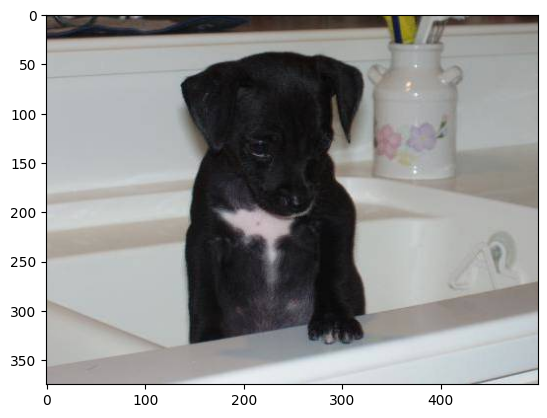

In [ ]:
#display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplot = plt.imshow(img)
plt.show()

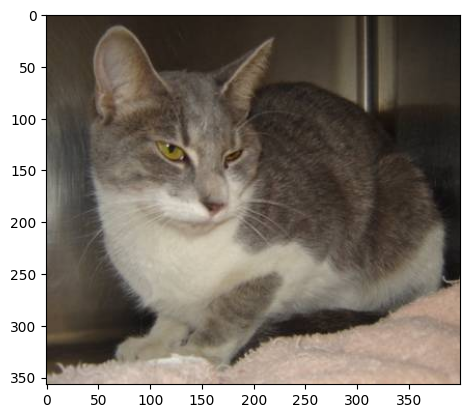

In [ ]:
#display dog image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])


dog
dog
dog
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  elif name == 'cat':
    cat_count += 1

print('Number of dog images',dog_count)
print('Number of cat images',cat_count)


Number of dog images 12500
Number of cat images 12500


Resizing all the images

In [ ]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
file_names = os.listdir('/content/image resized/')
print(file_names)

['dog.7728.jpg', 'dog.10395.jpg', 'dog.984.jpg', 'cat.8442.jpg', 'cat.7026.jpg', 'dog.1674.jpg', 'cat.10704.jpg', 'dog.7840.jpg', 'cat.2661.jpg', 'cat.6592.jpg', 'cat.11471.jpg', 'cat.5606.jpg', 'cat.8026.jpg', 'dog.580.jpg', 'cat.167.jpg', 'dog.10626.jpg', 'cat.8684.jpg', 'dog.8979.jpg', 'cat.7595.jpg', 'dog.353.jpg', 'dog.4098.jpg', 'cat.11851.jpg', 'dog.9635.jpg', 'dog.6006.jpg', 'dog.7338.jpg', 'cat.10579.jpg', 'dog.11866.jpg', 'dog.10293.jpg', 'dog.4379.jpg', 'dog.9040.jpg', 'dog.10488.jpg', 'cat.61.jpg', 'cat.1459.jpg', 'cat.658.jpg', 'cat.6995.jpg', 'cat.8788.jpg', 'dog.3712.jpg', 'cat.6805.jpg', 'cat.7518.jpg', 'cat.10912.jpg', 'dog.2743.jpg', 'cat.1115.jpg', 'dog.2369.jpg', 'dog.7424.jpg', 'cat.901.jpg', 'cat.11895.jpg', 'dog.4525.jpg', 'cat.9531.jpg', 'cat.8531.jpg', 'dog.6896.jpg', 'cat.6565.jpg', 'dog.708.jpg', 'dog.5970.jpg', 'cat.2641.jpg', 'dog.11830.jpg', 'dog.7526.jpg', 'dog.8729.jpg', 'dog.5667.jpg', 'cat.5415.jpg', 'dog.3773.jpg', 'cat.9915.jpg', 'cat.3393.jpg', 'dog

In [ ]:
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/image resized'))
file_count = len(files)
print('Number of image:',file_count)

Number of image: 25000


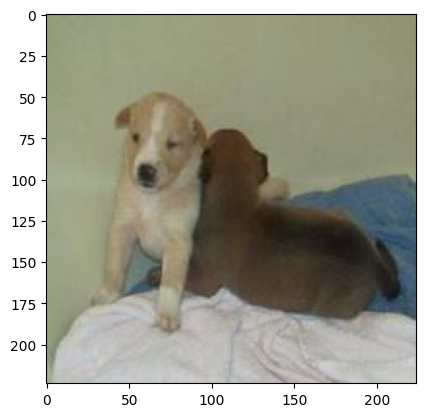

In [ ]:
#display resized dog image
img = mpimg.imread('/content/image resized/dog.7728.jpg')
imgplt = plt.imshow(img)
plt.show()

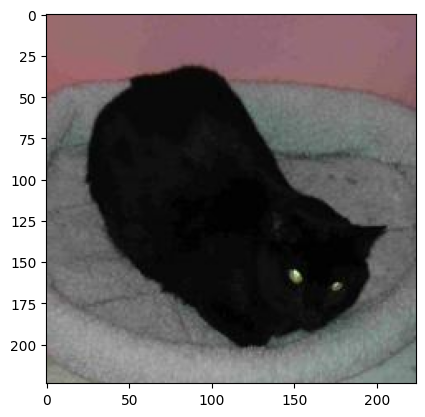

In [ ]:
#display resized cat image
img = mpimg.imread('/content/image resized/cat.8442.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats
Cat -> 0
Dog -> 1

In [ ]:
#creating a for loop to assign labels
resized_folder = '/content/image resized/'
filenames = os.listdir(resized_folder)
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  elif label == 'cat':
    labels.append(0)

In [ ]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels,return_counts=True)
print(values,counts)

[0 1] [1013  987]


Converting all the resized images to numpy array

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files=[]

[files.extend(glob.glob(image_directory + '*.' +e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [ ]:
print(dog_cat_images)

[[[[123 157 147]
   [122 156 146]
   [122 156 146]
   ...
   [115 146 143]
   [115 146 143]
   [115 146 143]]

  [[122 156 146]
   [122 156 146]
   [122 156 146]
   ...
   [115 146 143]
   [115 146 143]
   [115 146 143]]

  [[122 156 146]
   [122 156 146]
   [122 156 146]
   ...
   [115 146 143]
   [115 146 143]
   [115 146 143]]

  ...

  [[146 170 160]
   [151 175 165]
   [151 172 164]
   ...
   [199 202 200]
   [200 203 201]
   [201 204 202]]

  [[148 172 162]
   [151 175 165]
   [151 172 164]
   ...
   [199 202 200]
   [200 203 201]
   [201 204 202]]

  [[152 176 166]
   [153 177 167]
   [153 171 164]
   ...
   [199 202 200]
   [200 203 201]
   [201 204 202]]]


 [[[ 49  50  76]
   [ 58  59  85]
   [ 67  69  93]
   ...
   [ 29  46  37]
   [ 23  38  34]
   [ 35  50  46]]

  [[ 50  51  77]
   [ 59  60  86]
   [ 68  70  94]
   ...
   [ 28  44  37]
   [ 35  50  46]
   [ 57  71  69]]

  [[ 51  52  78]
   [ 61  62  88]
   [ 70  72  96]
   ...
   [ 39  53  51]
   [ 43  55  55]
   [ 42  54

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
y = np.asarray(labels)

Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600,), (400,))

In [ ]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.70588235, 0.79607843, 0.85882353],
         [0.70588235, 0.79607843, 0.85882353],
         [0.69803922, 0.79215686, 0.8627451 ],
         ...,
         [0.16470588, 0.30588235, 0.49411765],
         [0.17254902, 0.30588235, 0.48627451],
         [0.17647059, 0.30980392, 0.49019608]],

        [[0.71372549, 0.80392157, 0.86666667],
         [0.71372549, 0.80392157, 0.86666667],
         [0.70980392, 0.80392157, 0.8745098 ],
         ...,
         [0.16862745, 0.31764706, 0.50588235],
         [0.18039216, 0.32156863, 0.50196078],
         [0.18431373, 0.3254902 , 0.50588235]],

        [[0.7254902 , 0.81568627, 0.87843137],
         [0.7254902 , 0.81568627, 0.87843137],
         [0.72156863, 0.81568627, 0.88627451],
         ...,
         [0.16862745, 0.3254902 , 0.51372549],
         [0.18039216, 0.33333333, 0.50980392],
         [0.18823529, 0.34117647, 0.51764706]],

        ...,

        [[0.57254902, 0.65882353, 0.8       ],
         [0.57647059, 0.6627451 , 0.80392157]

Bulding the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = tf.keras.layers.Lambda(lambda x: hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)(x))

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - acc: 0.8371 - loss: 0.3263
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - acc: 0.9710 - loss: 0.0699
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.9722 - loss: 0.0642
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - acc: 0.9867 - loss: 0.0434
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - acc: 0.9896 - loss: 0.0335


In [ ]:
score, acc = model.evaluate(X_test_scaled,y_test)
print('Test loss:',score)
print('Test accuracy:',acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.9769 - loss: 0.0505
Test loss: 0.062145914882421494
Test accuracy: 0.9700000286102295


Predictive System

Path of the image to be predicted:/content/dog.jpg


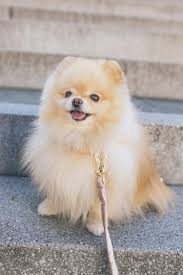

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1
The image is a dog


In [ ]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)

# Use cv2_imshow from google.colab.patches instead of cv2.imshow
from google.colab.patches import cv2_imshow
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print('The image is a cat')

else:
  print('The image is a dog')